# 🧠 1. Context: What Oracle ADS is showing

When you train a classification model in **Oracle ADS** (binary or multi-class), it automatically computes and visualizes several evaluation metrics under **Model Evaluation** in the ADS **Evaluate** report:

- **Confusion Matrix**
- **ROC Curve (AUC)**
- **Precision–Recall Curve**
- **Key metrics:** Accuracy, Precision, Recall, F1-score, AUC, Log-Loss

All of these help answer:

> **How well does my model distinguish between positive and negative cases?**

---

## ⚙️ 2. Confusion Matrix — the foundation

Every other metric comes from this 2×2 table for binary classification:

|                     | **Predicted Positive** | **Predicted Negative** |
|---------------------|------------------------|------------------------|
| **Actual Positive** | True Positive (**TP**) | False Negative (**FN**)|
| **Actual Negative** | False Positive (**FP**)| True Negative (**TN**) |

- **TP:** Model correctly predicts “Yes”  
- **TN:** Model correctly predicts “No”  
- **FP:** Model predicts “Yes” but it’s actually “No” (false alarm)  
- **FN:** Model predicts “No” but it’s actually “Yes” (missed case)

ADS shows this matrix as a heatmap with counts or percentages.

---

## 📈 3. ROC Curve (Receiver Operating Characteristic)

**Meaning**

The ROC curve plots the trade-off between:

- **True Positive Rate (TPR / Recall):** `TP / (TP + FN)`
- **False Positive Rate (FPR):** `FP / (FP + TN)`

Each point on the curve corresponds to a different **classification threshold** (the cut-off probability for predicting positive).

**How to read it**

- **X-axis:** FPR (false alarms)  
- **Y-axis:** TPR (recall)  
- The diagonal line (45°) = random guessing  
- The closer the curve hugs the **top-left corner**, the better.

**AUC (Area Under the Curve)**

- **AUC = 1.0** → perfect classifier  
- **AUC = 0.5** → random  
- In ADS, you’ll see this as a scalar metric (“AUC”) next to the ROC chart.

**Example interpretation**

> **AUC = 0.92** means: if you randomly pick one positive and one negative case, there’s a 92% chance the model assigns a higher probability to the positive one.

---

## 🎯 4. Precision and Recall

These focus on **positive predictions**.

| **Metric** | **Formula**        | **Interpretation**                                      |
|------------|--------------------|---------------------------------------------------------|
| Precision  | `TP / (TP + FP)`   | Of all “Yes” predictions, how many were actually “Yes”? |
| Recall (Sensitivity) | `TP / (TP + FN)` | Of all real “Yes” cases, how many did we catch?        |

**Trade-off**

- **High Precision** → fewer false alarms, may miss some positives.  
- **High Recall** → catch more positives, risk more false alarms.

ADS visualizes this in two ways:
- A **Precision–Recall curve** (especially useful for imbalanced data)  
- **Scalar metrics** (Precision, Recall) in the summary table

---

## ⚖️ 5. F1 Score

The F1-score combines **Precision** and **Recall** into one balanced number:


It’s the **harmonic mean** — high only if **both** Precision and Recall are high.

**Typical uses**
- Compare models when data is **imbalanced** (e.g., fraud detection, disease prediction).
- A high F1 means the model finds most positives **and** stays accurate in those predictions.

In ADS:
- You’ll see **F1** in the metrics table for each class (and **Macro F1** / **Weighted F1** for multi-class models).

---

## 🪄 6. How these appear in Oracle ADS charts

| **ADS Panel**            | **What it shows**                    | **How to read**                                      |
|--------------------------|--------------------------------------|------------------------------------------------------|
| ROC Curve                | Blue curve vs diagonal               | Area under curve (**AUC**) → higher is better        |
| Precision–Recall Curve   | Precision vs Recall trade-off        | Curves near the **top-right corner** are best        |
| Confusion Matrix         | Heatmap of TP/TN/FP/FN               | See which class is being misclassified               |
| Metrics Table            | Accuracy, Precision, Recall, F1, AUC | Quick numeric comparison                             |
| Lift / Gain Charts       | (optional) cumulative capture vs population | How well the model ranks positives early        |

---

## 🧩 7. Quick Example

Your binary model on **100** test samples yields:

|              | **Pred+** | **Pred−** |
|--------------|-----------|-----------|
| **Actual + (20)** | 15 TP     | 5 FN      |
| **Actual − (80)** | 8 FP      | 72 TN     |

Then:

- **Precision** = `15 / (15 + 8)` = **0.65**  
- **Recall** = `15 / (15 + 5)` = **0.75**  
- **F1** = `2 × (0.65 × 0.75) / (0.65 + 0.75)` = **0.70**  
- **Accuracy** = `(15 + 72) / 100` = **0.87**  
- **ROC AUC** ≈ **0.92** (if model ranks well)

ADS will visualize all of these automatically.

---

## 🧠 8. When to focus on each metric

| **Goal**                                | **Focus metric**                       |
|-----------------------------------------|----------------------------------------|
| General classification                   | Accuracy, AUC                          |
| Imbalanced data (rare positives)        | F1, Precision, Recall                  |
| Want fewer false alarms                  | Precision                              |
| Want to catch all positives              | Recall                                 |
| Want overall rank quality                | ROC AUC                                |
| Business-specific threshold tuning       | Use ROC or PR curve to pick a cutoff   |



#  1) Train a small binary classifier and compute metrics
Understand these metrics


In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    f1_score,
)
import matplotlib.pyplot as plt

# --- make a toy, slightly imbalanced dataset
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=6,
    n_redundant=2,
    weights=[0.8, 0.2],  # 20% positives
    random_state=42,
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# --- model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# --- predictions
y_prob = clf.predict_proba(X_test)[:, 1]     # probabilities for the positive class
y_pred = (y_prob >= 0.5).astype(int)         # class labels at threshold 0.5

# --- core metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# F1 at threshold 0.5
print("F1 (threshold=0.5):", f1_score(y_test, y_pred))

# --- ROC curve + AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# --- Precision–Recall curve + AP
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
print("Average Precision (area under PR curve):", ap)


Confusion Matrix:
 [[379  19]
 [ 36  66]]

Classification Report:
               precision    recall  f1-score   support

           0      0.913     0.952     0.932       398
           1      0.776     0.647     0.706       102

    accuracy                          0.890       500
   macro avg      0.845     0.800     0.819       500
weighted avg      0.885     0.890     0.886       500

F1 (threshold=0.5): 0.7058823529411765
ROC AUC: 0.9092521430682826
Average Precision (area under PR curve): 0.7866772092197145


# 2) Plot ROC and Precision–Recall curves

ROC curve / AUC: How well the model ranks positives above negatives across all thresholds. Closer to top-left is better; AUC closer to 1.0 is best.
Precision–Recall curve / AP: Especially informative for imbalanced data. Top-right area is best; high Average Precision is good.

Precision: Of predicted positives, how many were correct? (control false alarms)

Recall: Of actual positives, how many did we catch? (control misses)

F1: Single number balancing Precision and Recall (high only when both are high).

Threshold: Moving the cutoff changes Precision/Recall trade-off—use your business cost function to pick it.

| **Metric** | **What It Measures** | **Formula / Calculation** | **Value Range** | **Interpretation** |
|-------------|----------------------|----------------------------|-----------------|--------------------|
| **Accuracy** | Overall correctness of predictions | (TP + TN) / (TP + TN + FP + FN) | 0 → 1 | % of total predictions that were correct |
| **Precision (Positive Predictive Value)** | Of all predicted positives, how many were correct | TP / (TP + FP) | 0 → 1 | High = few false positives |
| **Recall (Sensitivity / True Positive Rate)** | Of all actual positives, how many were detected | TP / (TP + FN) | 0 → 1 | High = few missed positives |
| **Specificity (True Negative Rate)** | Of all actual negatives, how many were correctly predicted | TN / (TN + FP) | 0 → 1 | High = few false positives |
| **False Positive Rate (FPR)** | Fraction of negatives incorrectly classified as positives | FP / (FP + TN) | 0 → 1 | Used as X-axis in ROC curve |
| **False Negative Rate (FNR)** | Fraction of positives missed by the model | FN / (TP + FN) | 0 → 1 | Complement of Recall |
| **F1-Score** | Harmonic mean of Precision and Recall | 2 × (Precision × Recall) / (Precision + Recall) | 0 → 1 | High only if both Precision & Recall are high |
| **ROC Curve (Receiver Operating Characteristic)** | Trade-off between Recall (TPR) and False Positive Rate | Plot TPR (Y) vs FPR (X) | Curve | Closer to top-left = better |
| **AUC (Area Under ROC Curve)** | Overall ability to rank positives above negatives | Area under ROC curve | 0.5 → 1 | AUC = 1: perfect; 0.5: random |
| **Precision–Recall (PR) Curve** | Trade-off between Precision and Recall | Plot Precision (Y) vs Recall (X) | Curve | High area = good for imbalanced data |
| **Average Precision (AP)** | Area under Precision–Recall curve | Integration of Precision–Recall curve | 0 → 1 | Higher = better on rare positives |
| **Log-Loss (Cross-Entropy)** | Penalizes wrong confident predictions | −(1/N) Σ [y log(p) + (1−y) log(1−p)] | 0 → ∞ | Lower = better probability calibration |
| **Balanced Accuracy** | Mean of Recall for each class | (TPR + TNR) / 2 | 0 → 1 | Accounts for class imbalance |
| **MCC (Matthews Corr. Coefficient)** | Correlation between observed & predicted labels | (TP×TN−FP×FN) / √((TP+FP)(TP+FN)(TN+FP)(TN+FN)) | −1 → 1 | +1 perfect, 0 random, −1 inverse |


## 📈 What the ROC Curve Plots

| **Axis** | **Meaning** | **Formula** |
|-----------|-------------|-------------|
| **X-axis** | **False Positive Rate (FPR)** — how often negatives are incorrectly classified as positives | `FPR = FP / (FP + TN)` |
| **Y-axis** | **True Positive Rate (TPR)** — how often positives are correctly classified | `TPR = TP / (TP + FN)` |


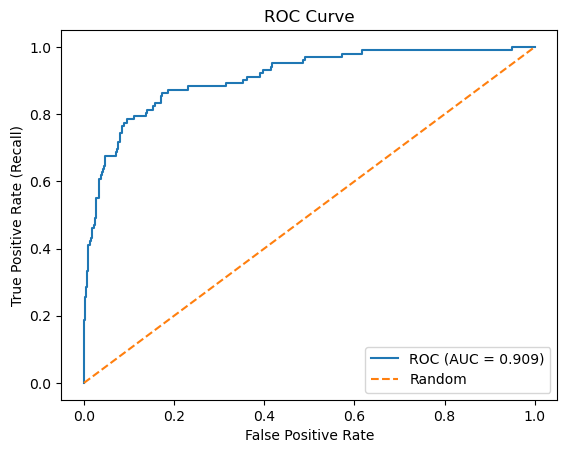

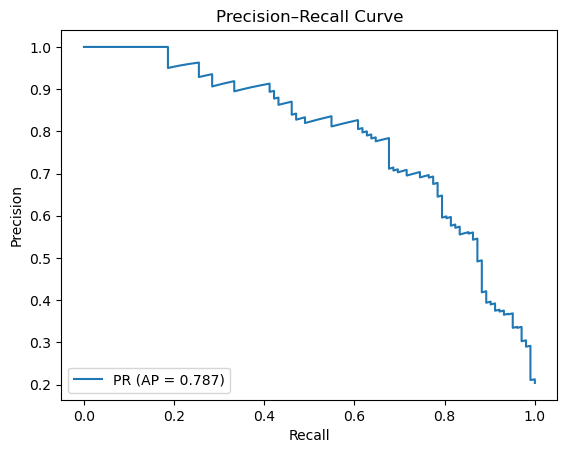

In [3]:
# ROC
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Precision–Recall
plt.figure()
plt.plot(recall, precision, label=f"PR (AP = {ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend(loc="lower left")
plt.show()


# 3) Try different decision thresholds (see trade-offs)

In [4]:
import numpy as np

def summarize_at_threshold(th):
    yp = (y_prob >= th).astype(int)
    c = confusion_matrix(y_test, yp)
    p = (c[1,1]) / max(1, (c[1,1] + c[0,1]))        # Precision = TP / (TP+FP)
    r = (c[1,1]) / max(1, (c[1,1] + c[1,0]))        # Recall = TP / (TP+FN)
    f1 = 2*p*r / max(1e-12, (p + r))                # harmonic mean
    return th, p, r, f1, c

for th in [0.3, 0.5, 0.7]:
    th, p, r, f1, c = summarize_at_threshold(th)
    print(f"th={th:.2f}  Precision={p:.3f}  Recall={r:.3f}  F1={f1:.3f}  CM={c.tolist()}")


th=0.30  Precision=0.656  Recall=0.784  F1=0.714  CM=[[356, 42], [22, 80]]
th=0.50  Precision=0.776  Recall=0.647  F1=0.706  CM=[[379, 19], [36, 66]]
th=0.70  Precision=0.880  Recall=0.431  F1=0.579  CM=[[392, 6], [58, 44]]
